In [23]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [24]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Thêm cột nhãn (0: Setosa, 1: Versicolor, 2: Virginica)





print("=== Bước 1.1: Kiểm tra dữ liệu ban đầu ===")
print("Thông tin cơ bản về dữ liệu:")
print(data.head())  # Hiển thị 5 dòng đầu
print("\nSố lượng mẫu và đặc trưng:", data.shape)  # (150, 5)
print("\nTên các lớp:", iris.target_names)  # ['setosa', 'versicolor', 'virginica']
# Kiểm tra outlier bằng IQR (Interquartile Range)
Q1 = data.drop('target', axis=1).quantile(0.25)
Q3 = data.drop('target', axis=1).quantile(0.75)
IQR = Q3 - Q1
outliers = ((data.drop('target', axis=1) < (Q1 - 1.5 * IQR)) | (data.drop('target', axis=1) > (Q3 + 1.5 * IQR))).sum()
print("\nSố lượng outlier trên mỗi đặc trưng:")
print(outliers)


=== Bước 1.1: Kiểm tra dữ liệu ban đầu ===
Thông tin cơ bản về dữ liệu:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Số lượng mẫu và đặc trưng: (150, 5)

Tên các lớp: ['setosa' 'versicolor' 'virginica']

Số lượng outlier trên mỗi đặc trưng:
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [25]:
print("\n=== Bước 1.2: Phân tích dữ liệu ===")
print("Thông tin cấu trúc dữ liệu:")
print(data.info())  # Kiểu dữ liệu, số hàng/cột
print("\nThống kê mô tả (mean, std, min, max, ...):")
print(data.describe())  # Mean, std, min, max, percentile
print("\nKiểm tra giá trị null:")
print(data.isnull().sum())  # Kiểm tra số lượng giá trị null
print("\nPhân bố các lớp (target):")
print(data['target'].value_counts())  # Đếm số lượng mỗi lớp

# Kiểm tra outlier bằng IQR (Interquartile Range)
Q1 = data.drop('target', axis=1).quantile(0.25)
Q3 = data.drop('target', axis=1).quantile(0.75)
IQR = Q3 - Q1
outliers = ((data.drop('target', axis=1) < (Q1 - 1.5 * IQR)) | (data.drop('target', axis=1) > (Q3 + 1.5 * IQR))).sum()
print("\nSố lượng outlier trên mỗi đặc trưng:")
print(outliers)


=== Bước 1.2: Phân tích dữ liệu ===
Thông tin cấu trúc dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Thống kê mô tả (mean, std, min, max, ...):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%   


=== Bước 1.3: Tiền xử lý dữ liệu ===
Dữ liệu sau khi chuẩn hóa (mẫu đầu tiên):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Thống kê sau chuẩn hóa:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-0

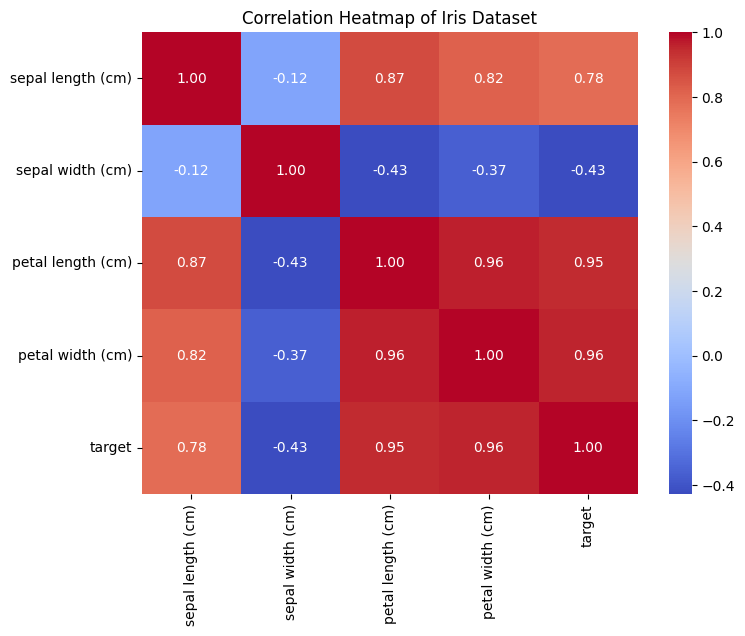

In [26]:
print("\n=== Bước 1.3: Tiền xử lý dữ liệu ===")
scaler = StandardScaler()  # Sử dụng StandardScaler
X = data.drop('target', axis=1)  # Lấy các đặc trưng
X_scaled = scaler.fit_transform(X)  # Chuẩn hóa dữ liệu
data_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)  # Chuyển về DataFrame
data_scaled['target'] = data['target']  # Thêm lại cột nhãn
print("Dữ liệu sau khi chuẩn hóa (mẫu đầu tiên):")
print(data_scaled.head())
print("\nThống kê sau chuẩn hóa:")
print(data_scaled.describe())  # Kiểm tra mean ~0, std ~1

# Kiểm tra mean và std sau chuẩn hóa
print("\nKiểm tra mean và std sau chuẩn hóa (đảm bảo mean ~0, std ~1):")
stats = data_scaled.drop('target', axis=1).describe()
print(stats)
print("\nMean của các đặc trưng:", stats.loc['mean'].values)
print("Std của các đặc trưng:", stats.loc['std'].values)


# Lưu scaler và dữ liệu chuẩn hóa
joblib.dump(scaler, 'scaler.pkl')
print("Scaler đã được lưu vào 'scaler.pkl'")
data_scaled.to_csv('iris_scaled.csv', index=False)
print("Dữ liệu chuẩn hóa đã được lưu vào 'iris_scaled.csv'")

# Bước 1.4: Vẽ Correlation Heatmap
print("\n=== Bước 1.4: Vẽ Correlation Heatmap ===")
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()



=== Bước 1.5: Vẽ Histograms ===


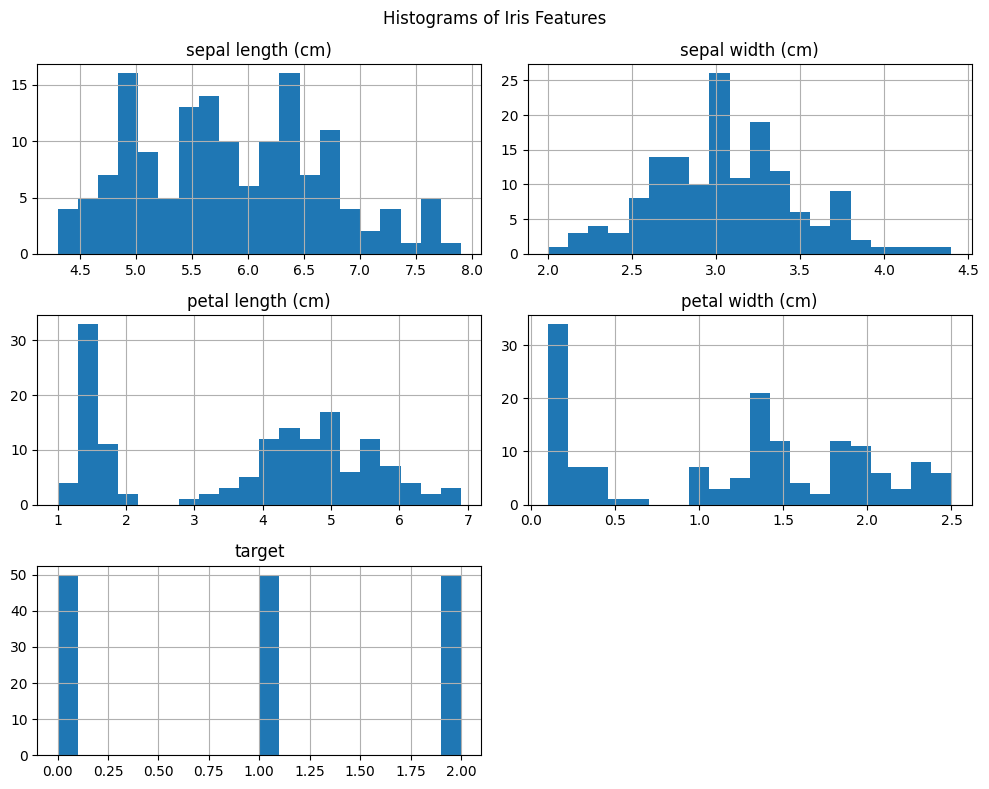


=== Bước 1.6: Vẽ Boxplot (bổ sung) ===


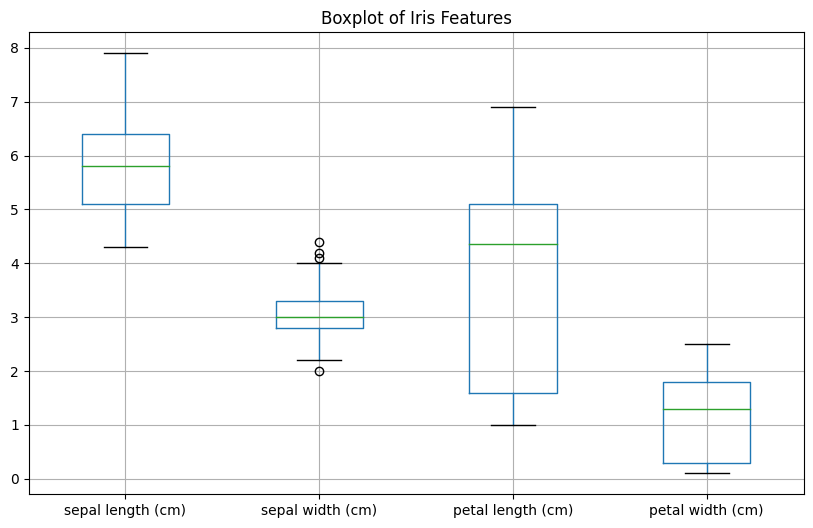

In [27]:
print("\n=== Bước 1.5: Vẽ Histograms ===")
data.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# Bước 1.6: Vẽ Boxplot 
print("\n=== Bước 1.6: Vẽ Boxplot (bổ sung) ===")
data.drop('target', axis=1).boxplot(figsize=(10, 6))
plt.title("Boxplot of Iris Features")
plt.show()


=== Bước 1.5: Vẽ Histograms ===


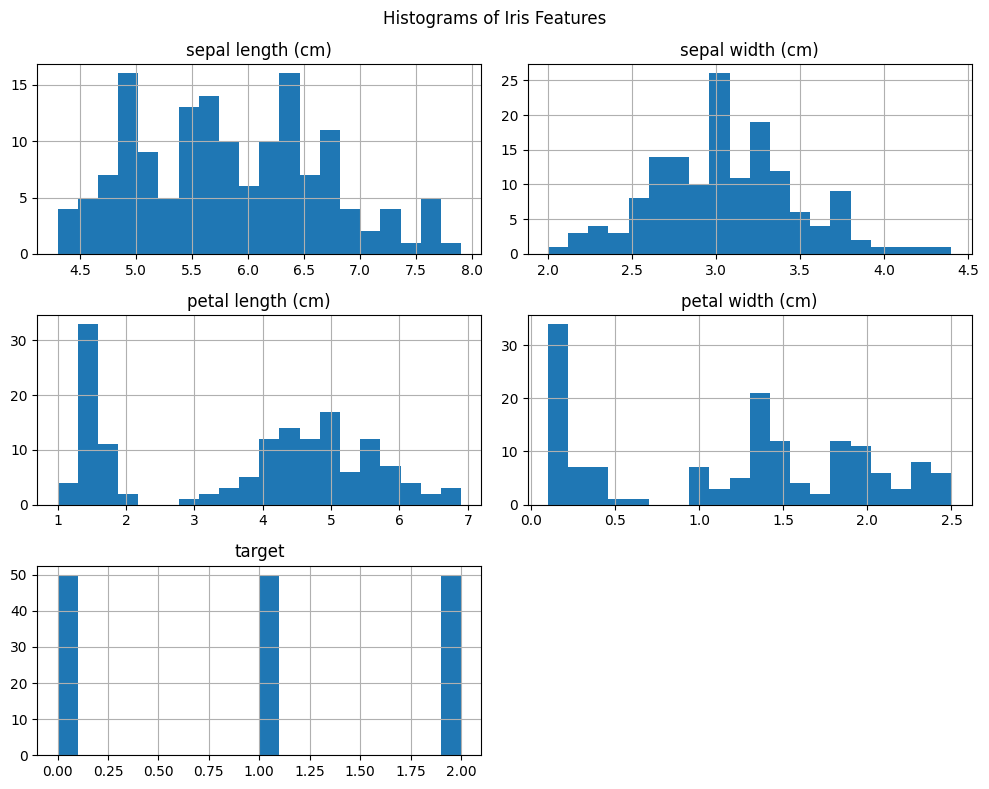


=== Bước 1.6: Vẽ Boxplot (bổ sung) ===


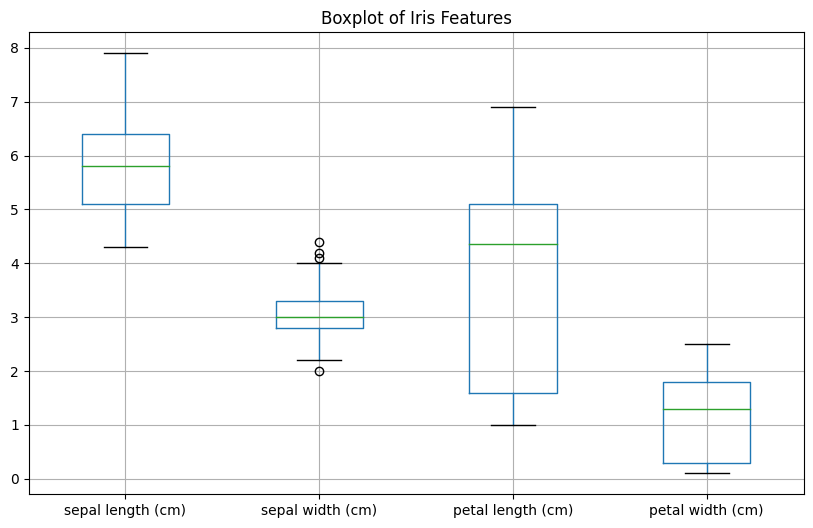

In [28]:
print("\n=== Bước 1.5: Vẽ Histograms ===")
data.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# Bước 1.6: Vẽ Boxplot 
print("\n=== Bước 1.6: Vẽ Boxplot (bổ sung) ===")
data.drop('target', axis=1).boxplot(figsize=(10, 6))
plt.title("Boxplot of Iris Features")
plt.show()

In [29]:
print("\n=== Bước 1.7: Quan sát và phân tích biểu đồ ===")
print("""
Hướng dẫn quan sát và phân tích biểu đồ:
1. **Correlation Heatmap**:
   - petal length và petal width có tương quan cao (~0.96), là đặc trưng quan trọng.
   - sepal length và sepal width có tương quan thấp (~0.12).
2. **Histograms**:
   - petal length và petal width phân biệt rõ Setosa với các loài khác.
   - sepal length và sepal width có phân bố chồng lấn.
3. **Boxplot**:
   - sepal width có vài outlier, các đặc trưng khác ổn định.
""")


=== Bước 1.7: Quan sát và phân tích biểu đồ ===

Hướng dẫn quan sát và phân tích biểu đồ:
1. **Correlation Heatmap**:
   - petal length và petal width có tương quan cao (~0.96), là đặc trưng quan trọng.
   - sepal length và sepal width có tương quan thấp (~0.12).
2. **Histograms**:
   - petal length và petal width phân biệt rõ Setosa với các loài khác.
   - sepal length và sepal width có phân bố chồng lấn.
3. **Boxplot**:
   - sepal width có vài outlier, các đặc trưng khác ổn định.



In [30]:
# Import các thư viện cần thiết cho bước 2 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
# ==============================
# Bước 2.1: Baseline model (trên data gốc)
# ==============================

from sklearn.model_selection import train_test_split

# Dữ liệu gốc (chưa chuẩn hóa)
X_original = data.drop('target', axis=1)
y_original = data['target']

# Chia train/test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

# Baseline rule
def baseline_rule(petal_length):
    if petal_length < 2.5:
        return 0  # Setosa
    elif petal_length < 5.0:
        return 1  # Versicolor
    else:
        return 2  # Virginica

# Cột petal_length trong X_train_orig
petal_length_train = X_train_orig.iloc[:, 2].values

# Dự đoán baseline
manual_predictions = [
    baseline_rule(petal_length) for petal_length in petal_length_train
]

# Accuracy baseline
manual_accuracy = np.mean(manual_predictions == y_train_orig.values)

print(f"Baseline model accuracy: {manual_accuracy * 100:.2f}%")


Baseline model accuracy: 95.83%


In [39]:
# ==============================
# Bước 2.2: Huấn luyện mô hình MLPClassifier
# ==============================

# Dữ liệu chuẩn hóa (chuẩn hóa từ Bước 1)
X_scaled = data_scaled.drop('target', axis=1)
y_scaled = data_scaled['target']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42, stratify=y_scaled
)

# MLPClassifier
from sklearn.neural_network import MLPClassifier
import joblib

model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

# Huấn luyện
model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(model, 'iris_mlp_model.pkl')

# Loss
print(f"Loss sau huấn luyện: {model.loss_:.4f}")


Loss sau huấn luyện: 0.0512



=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%
Precision (macro): 96.97%
Recall (macro): 96.67%
F1-score (macro): 96.66%


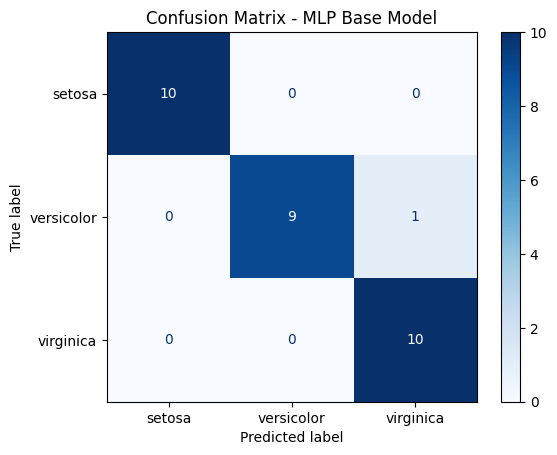

In [40]:
# ==============================
# Bước 3: Đánh giá mô hình MLPClassifier
# ==============================

from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Các chỉ số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (macro): {precision * 100:.2f}%")
print(f"Recall (macro): {recall * 100:.2f}%")
print(f"F1-score (macro): {f1 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLP Base Model")
plt.show()
